# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №4

Задание выполнил(а): Скворцов Иван

### Общая информация

__Дата выдачи:__ 24.05.2020

__Дедлайн:__ 23:59 07.06.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
min(\text{points}, 19)  \times 10 / 19,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 19, а максимальное число дополнительных баллов, которые пойдут в бонус — 1.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-4: zG1cIyT

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

In [64]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 

## Random Forest своими руками (4 балла)

Реализуйте алгоритм случайного леса. В соответствии с построением алгоритма, ваша реализация должна сочетать в себе метод бэггинга и метод случайных подмножеств. Также она должна работать для двух типов задач: как для задачи регрессии, так и для задачи классификации.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn`.*

In [7]:
from scipy import stats # штука для подсчета итогов голосования

class RandomForest:
    def __init__(self, n_estimators, max_depth, max_features='sqrt', task_type='regression'):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        max_features - maximum features for each split in DecisionTree from sklearn
        task_type - 'regression' or 'classification'
        """

        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.task_type = task_type
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """


        self.X = X_train
        self.y = y_train

        observations = self.X.shape[0]

        self.estimators = []

        if self.task_type == 'regression':

            for _ in range(self.n_estimators):

                self.algorithm = DecisionTreeRegressor(splitter = 'best',
                max_depth = self.max_depth, max_features = self.max_features)
        
                i = np.random.choice(observations, observations) # формируем выборку исходной длины с возвращением
                sample_X = self.X[i]
                sample_y = self.y[i]
                tree = self.algorithm.fit(sample_X, sample_y)
                self.estimators.append(tree)

        elif self.task_type == 'classification':
            
            for _ in range(self.n_estimators):

                self.algorithm = DecisionTreeClassifier(splitter = 'best', 
                max_depth = self.max_depth, max_features = self.max_features)
                
                i = np.random.choice(observations, observations) # формируем выборку исходной длины с возвращением
                sample_X = self.X[i]
                sample_y = self.y[i]
                tree = self.algorithm.fit(sample_X, sample_y)
                self.estimators.append(tree)


        self.estimators = np.array(self.estimators)
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """

        self.X_test = X_test
        self.predictions = []

        for estimator in self.estimators:
            self.predictions.append(estimator.predict(self.X_test))

        self.predictions = np.array(self.predictions)

        if self.task_type == 'regression':
            y_pred = np.mean(self.predictions, axis = 0)
        else:
            y_pred = stats.mode(self.predictions, axis = 0).mode[0]

        return y_pred

Проверьте вашу реализацию на задаче регрессии. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10.25 **(не меняйте параметры сида)**.

In [8]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [16]:
np.random.seed(19052019)

forest = RandomForest(n_estimators = 1000, max_depth = None, max_features=0.325, task_type='regression')
forest.fit(X_train, y_train)
mean_squared_error(y_test, forest.predict(X_test))

9.724249536063093

Проверьте вашу реализацию на задаче классификации. Подберите оптимальные гиперпараметры, чтобы получить accuracy > 0.83 **(не меняйте параметры сида)**.

In [17]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [18]:
np.random.seed(19052019)

forest = RandomForest(n_estimators = 1000, max_depth = None, max_features='sqrt', task_type='classification')

forest.fit(X_train, y_train)
print('Accuracy for custom Random Forest: {}'.format(accuracy_score(y_test, forest.predict(X_test))))

Accuracy for custom Random Forest: 0.9440559440559441


## Градиентный бустинг своими руками (5 + 1* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Однако чтобы получить дополнительный 1 балл вам нужно реализовать нахождение оптимального $\gamma_N$ на каждом шаге.

В качестве функции потерь возьмите MSE.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [11]:
# это может помочь вам для поиска оптимальных gamma

from scipy.optimize import minimize

In [12]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        
        pass
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        pass
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        return y_pred

Проверьте вашу реализацию. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10 как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**.

In [13]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [14]:
np.random.seed(19052019)

# YOUR CODE HERE

In [34]:
mean_squared_error(y_test, y_pred)

9.431819650354331

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- Да / Нет

## Ансамблевые методы (10 баллов)

Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

In [22]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [ ]:
plt.style.use('ggplot')
mpl.rcParams['axes.titlesize'] = 17
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [27]:
data = pd.read_csv('./diabetes.csv')

In [28]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

Посмотрим на признаки и их статистики:

In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Очевидно, что нули имеют смысл в случае переменной `Pregnancies` (беременности) и `Outcome` (дамми на диабет), так что обрабатывать их не будем. В случаях с `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin` и `BMI` нули отвечают за пропуски, поскольку область значений этих переменных обычно не включает ноль (это можно увидеть и на гистограммах ниже). В переменной `Age` нет нулей (min = 21), а `DiabetesPedigreeFunction` может принимать нулевые значения, поскольку отвечает за степень предрасположенности к диабету.

Задаем список переменных, с которыми будем разбираться:

In [30]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

Заменим нули в этих столбцах на `np.nan`:

In [31]:
data[cols] = data[cols].replace({0:np.nan})

Проверим, что все прошло успешно:

In [32]:
data.info() # урааа...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


Теперь со спокойной душой можно заполнить пропуски средним. Однако делать это будем не у всех переменных, а только у тех, где количество пропусков невелико; в обратном случае честно признаем, что данных нет.

Пропусков не очень много в столбцах `Glucose`, `BloodPressure` и `BMI`.

In [33]:
cols =  ['Glucose', 'BloodPressure', 'BMI']

data[cols] = data[cols].fillna(data[cols].mean())

Сделано!

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

Эта задача слишком проста для студента ИАДа...

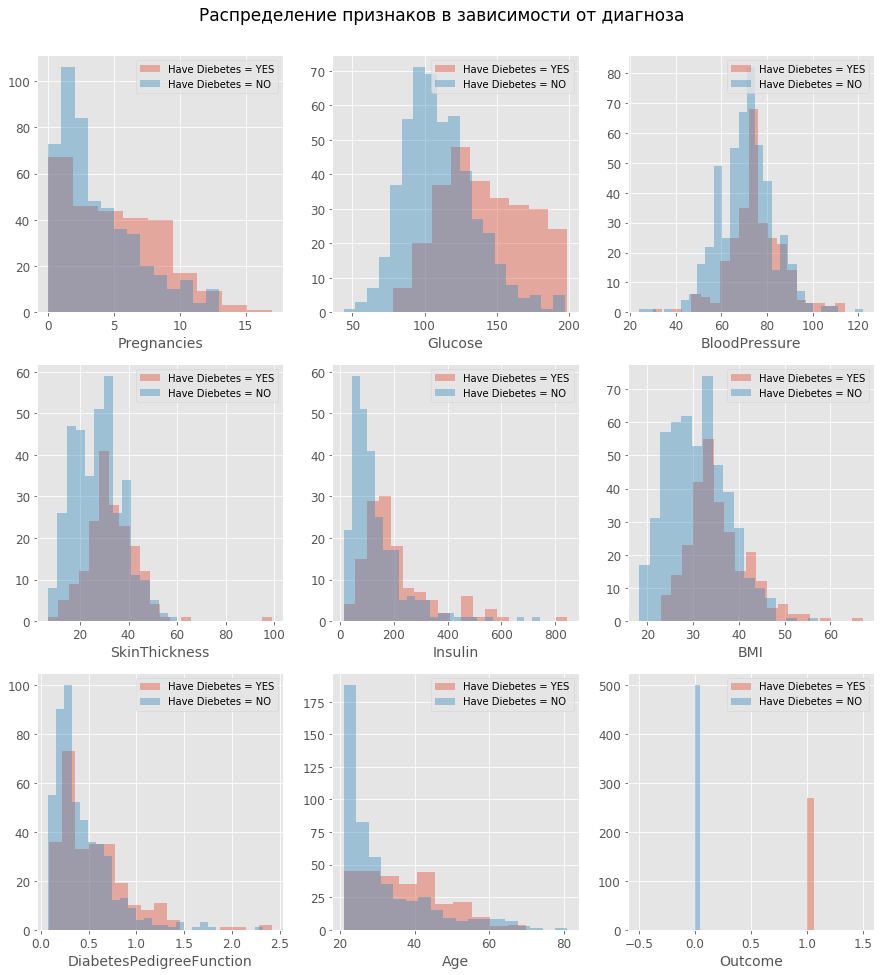

In [54]:
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
plt.suptitle('Распределение признаков в зависимости от диагноза', size=17)

for i, axis in enumerate(ax.reshape(-1)): 
    sns.distplot(data.query('Outcome == 1')[data.columns[i]], kde = False, label = 'Have Diebetes = YES', ax = axis)
    sns.distplot(data.query('Outcome == 0')[data.columns[i]], kde = False, label = 'Have Diebetes = NO', ax = axis)

    axis.set_xlabel('{}'.format(data.columns[i]))
    axis.set_ylabel('')
    axis.legend()

fig.subplots_adjust(top=0.935)
plt.show()

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите `BaggingClassifier` на деревьях (поставьте параметр `'base_estimator' = DecisionTreeClassifier()`) и `RandomForest`. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*Подсказка: создайте отдельную функцию для вывода метрик качества.*

*Подсказка подсказке: в sklearn уже "есть такая ~~партия~~ функция!"*

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:
data.dropna(inplace = True)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis = 1), data['Outcome'], test_size=0.3, random_state=13)

In [104]:
bagging = BaggingClassifier(n_estimators = 10, base_estimator = DecisionTreeClassifier())
forest = RandomForestClassifier(n_estimators = 10)

bagging.fit(X_train, y_train)
forest.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
print('Качество BaddingClassifier: \n\n', classification_report(y_test, bagging.predict(X_test), digits = 3), '\n')
print('Качество RandomForestClassifier: \n\n', classification_report(y_test, forest.predict(X_test), digits = 3))

Качество BaddingClassifier: 

               precision    recall  f1-score   support

           0      0.856     0.933     0.892        89
           1      0.727     0.533     0.615        30

    accuracy                          0.832       119
   macro avg      0.791     0.733     0.754       119
weighted avg      0.823     0.832     0.823       119
 

Качество RandomForestClassifier: 

               precision    recall  f1-score   support

           0      0.824     0.944     0.880        89
           1      0.706     0.400     0.511        30

    accuracy                          0.807       119
   macro avg      0.765     0.672     0.695       119
weighted avg      0.794     0.807     0.787       119



Видим, что случайный лес показал себя хуже бэггинга по показателям *accuracy* и *f-score*. Это может быть связано с тем, что преимущество случайного леса (с его методом случайных подмножеств признаков) проявляется при достаточно большом количестве базовых моделей. Попробуем показать это графически, построив динамику accuracy для случайного леса и бэггинга в зависимости от количества алгоритмов.

In [132]:
np.random.seed(100500)

bag_ac = []
for_ac = []
bag_f = []
for_f = []
n_es = 3 ** np.arange(2, 10)

for i in n_es: 
    bagging = BaggingClassifier(n_estimators = i, base_estimator = DecisionTreeClassifier())
    forest = RandomForestClassifier(n_estimators = i)
    bagging.fit(X_train, y_train)
    forest.fit(X_train, y_train)

    bag_predict = bagging.predict(X_test)
    for_predict = forest.predict(X_test)

    bag_ac.append(accuracy_score(y_test, bag_predict))
    for_ac.append(accuracy_score(y_test, for_predict))

    bag_f.append(f1_score(y_test, bag_predict))
    for_f.append(f1_score(y_test, for_predict))

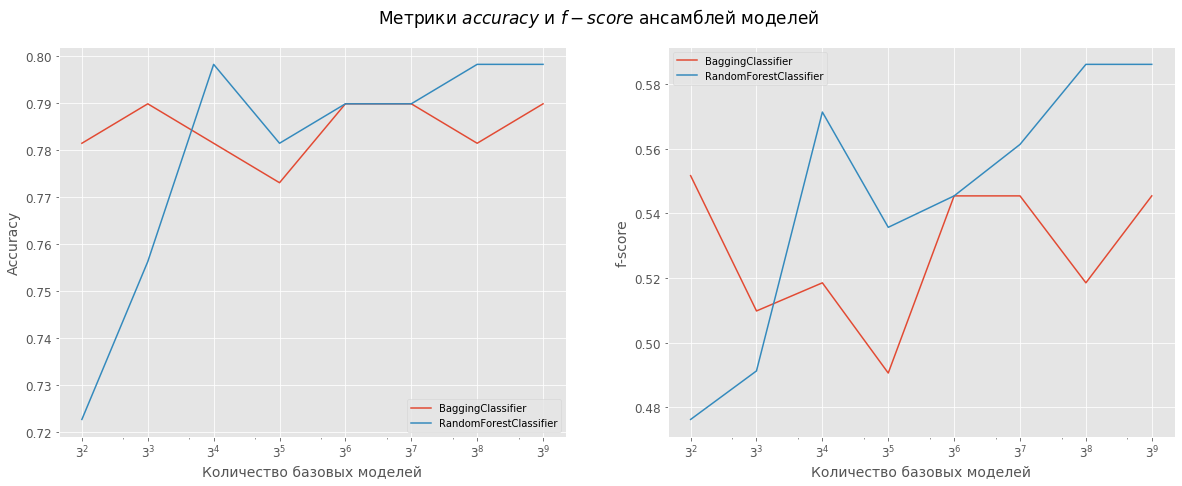

In [163]:
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
plt.suptitle('Метрики $accuracy$ и $f-score$ ансамблей моделей', size=17)


sns.lineplot(n_es, bag_ac, label = 'BaggingClassifier', ax = ax[0])
sns.lineplot(n_es, for_ac, label = 'RandomForestClassifier', ax = ax[0])

sns.lineplot(n_es, bag_f, label = 'BaggingClassifier', ax = ax[1])
sns.lineplot(n_es, for_f, label = 'RandomForestClassifier', ax = ax[1])

ax[0].set_xlabel('Количество базовых моделей')
ax[1].set_xlabel('Количество базовых моделей')
ax[0].set_ylabel('Accuracy')
ax[1].set_ylabel('f-score')

ax[0].set_xscale("log", basex = 3)
ax[1].set_xscale("log", basex = 3)
fig.subplots_adjust(top=0.9)
plt.show()

Похоже, это предположение действительно имеет смысл.

**4. (2 балл)** Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров:
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Какие выводы вы можете сделать?

Для удобства создадим датасет со значениями AUC-ROC при различных `n_estimators` (от 10 до 1500 с шагом 90) и `min_samples_leaf` (от 1 до 30 с шагом 5).

In [154]:
data = []

for i in np.arange(10, 1500, 90):
    for j in np.arange(1, 30, 5):

        forest = RandomForestClassifier(n_estimators = i, min_samples_leaf = j)
        forest.fit(X_train, y_train)
        for_predict = forest.predict(X_test)
        for_auc_roc = accuracy_score(y_test, for_predict)

        data.append(np.array([i, j, for_auc_roc]))

data = np.array(data)
data = pd.DataFrame(data, columns = ['n_estimators', 'min_samples_leaf', 'AUC-ROC'])

Строим графики:

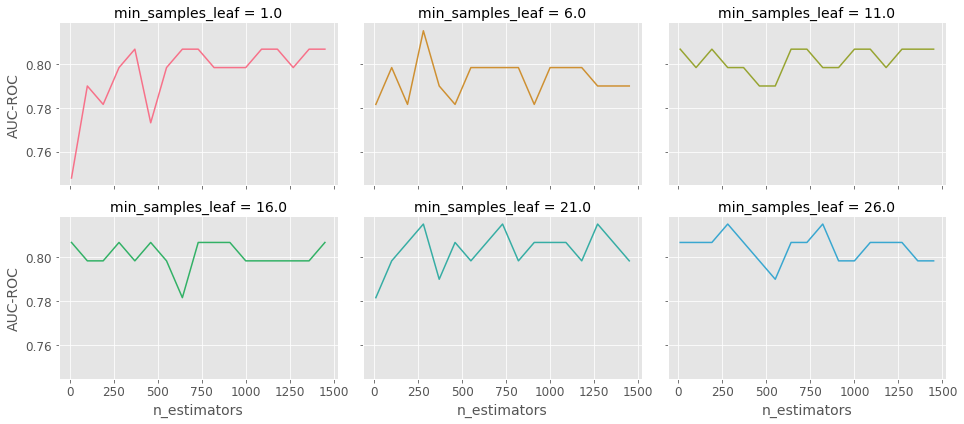

In [187]:
g = sns.FacetGrid(data, col = "min_samples_leaf", col_wrap = 3, hue = 'min_samples_leaf', palette = sns.color_palette("husl", 8), aspect = 1.5, height = 3)
g = g.map(plt.plot, "n_estimators", "AUC-ROC")

Заметно, что улучшение качества ансамбля наблюдается только при `min_samples_leaf` = 1, что логично, поскольку в этом случае в ансамбль входят глубокие переобученные деревья, композиция которых эффективно снижает разброс и приводит к повышению AUC-ROC. При других значениях `min_samples_leaf` базовые алгоритмы, видимо, и так достаточно хороши.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим атрибутом случайного леса в библиотеке `sklearn`, чтобы построить `barplot`.

**6. (2 балла)** Обучите `HistGradientBoostingClassifier` и `GradientBoostingClassifier` из `sklearn`. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

**7. (1.5 балла)** Вспомните, что представляет из себя стэкинг моделей. Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классификатор из уже вами изученных на курсе. В качестве мета-классификатора (модели, обученной на ответах) используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

В данном пункте мы можете как написать код для стекинга сами, так и использовать [`StackingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier).

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
#░░░░░░░░░░░░░░░░░░░░░▄▀░░▌
#░░░░░░░░░░░░░░░░░░░▄▀▐░░░▌
#░░░░░░░░░░░░░░░░▄▀▀▒▐▒░░░▌
#░░░░░▄▀▀▄░░░▄▄▀▀▒▒▒▒▌▒▒░░▌
#░░░░▐▒░░░▀▄▀▒▒▒▒▒▒▒▒▒▒▒▒▒█    -- Говно.
#░░░░▌▒░░░░▒▀▄▒▒▒▒▒▒▒▒▒▒▒▒▒▀▄
#░░░░▐▒░░░░░▒▒▒▒▒▒▒▒▒▌▒▐▒▒▒▒▒▀▄
#░░░░▌▀▄░░▒▒▒▒▒▒▒▒▐▒▒▒▌▒▌▒▄▄▒▒▐
#░░░▌▌▒▒▀▒▒▒▒▒▒▒▒▒▒▐▒▒▒▒▒█▄█▌▒▒▌
#░▄▀▒▐▒▒▒▒▒▒▒▒▒▒▒▄▀█▌▒▒▒▒▒▀▀▒▒▐░░░▄
#▀▒▒▒▒▌▒▒▒▒▒▒▒▄▒▐███▌▄▒▒▒▒▒▒▒▄▀▀▀▀
#▒▒▒▒▒▐▒▒▒▒▒▄▀▒▒▒▀▀▀▒▒▒▒▄█▀░░▒▌▀▀▄▄
#▒▒▒▒▒▒█▒▄▄▀▒▒▒▒▒▒▒▒▒▒▒░░▐▒▀▄▀▄░░░░▀
#▒▒▒▒▒▒▒█▒▒▒▒▒▒▒▒▒▄▒▒▒▒▄▀▒▒▒▌░░▀▄
#▒▒▒▒▒▒▒▒▀▄▒▒▒▒▒▒▒▒▀▀▀▀▒▒▒▄▀